<h1>Dummy Variables</h1>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Detailed_Details import Detailed_Details
import statsmodels.api as sm
import seaborn
seaborn.set()

<h2>Load Data</h2>

In [2]:
df=pd.read_csv('datasets/Dummies.csv')

In [3]:
df.sample(5)

,SAT,GPA,Attendance
46,1824,3.40,Yes
66,1850,3.52,Yes
13,1712,3.08,No
3,1685,2.74,No
32,1775,3.29,No


In [4]:
Detailed_Details(df,'Attendance','SAT',2)

Attendance,Total No. (Attendance),Percentage (Attendance),Total No.(Greater Than Mean),Percentage(Greater Than Mean),Total No.(Less Than Mean),Percentage (Less Than Mean)
No,45,53.57 %,17,37.78 %,28,62.22 %
Yes,39,46.43 %,25,64.1 %,14,35.9 %


In [5]:
m={'Yes':1,'No':0}
df['Attendance']=df['Attendance'].map(m)

In [6]:
df.sample(5)

,SAT,GPA,Attendance
29,1794,3.28,0
62,1893,3.50,1
49,1979,3.41,0
40,1865,3.37,0
2,1760,2.54,0


In [7]:
df.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [8]:
Detailed_Details(df,'Attendance','SAT',2)

Attendance,Total No. (Attendance),Percentage (Attendance),Total No.(Greater Than Mean),Percentage(Greater Than Mean),Total No.(Less Than Mean),Percentage (Less Than Mean)
0,45,53.57 %,17,37.78 %,28,62.22 %
1,39,46.43 %,25,64.1 %,14,35.9 %


<h3>Regression</h3>

In [10]:
y=df['GPA']
x1=df[['SAT','Attendance']]

In [12]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           2.19e-15
Time:                        20:28:16   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Regression Line</h3>

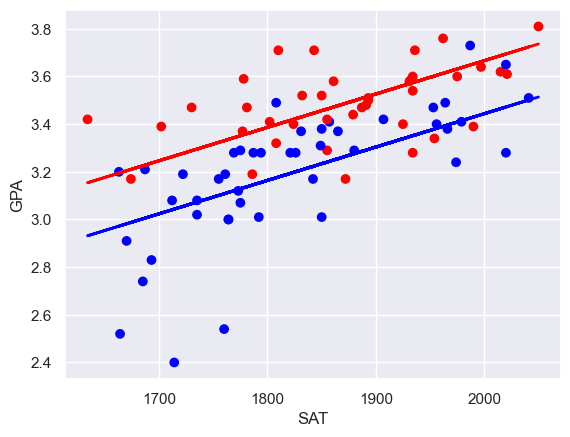

In [31]:
plt.scatter(df['SAT'],y,c=df['Attendance'],cmap=('bwr'))
yhat_no=0.6439+0.0014*df['SAT']
yhat_yes=0.8665+0.0014*df['SAT']
fig=plt.plot(df['SAT'],yhat_no,lw=2,c='blue')
fig=plt.plot(df['SAT'],yhat_yes,lw=2,c='red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()


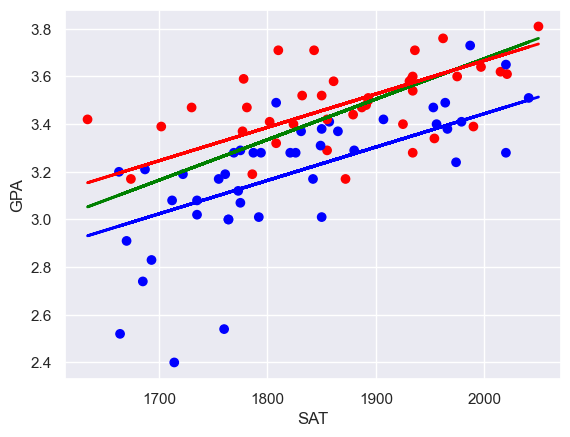

In [34]:
plt.scatter(df['SAT'],y,c=df['Attendance'],cmap=('bwr'))
yhat_no=0.6439+0.0014*df['SAT']
yhat_yes=0.8665+0.0014*df['SAT']
yhat=0.275+0.0017*df['SAT']
fig=plt.plot(df['SAT'],yhat,lw=2,c='green')
fig=plt.plot(df['SAT'],yhat_no,lw=2,c='blue')
fig=plt.plot(df['SAT'],yhat_yes,lw=2,c='red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()